In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


EJERCICIO 1: CORRELACION

Funciones utilizadas


In [ ]:
def cargar_gris_float(ruta):
    """
    Lee imagen en escala de grises y la devuelve como float32 (0..255).
    """
    img = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(ruta)
    return img.astype(np.float32)

def asegurar_filas_pares(img):
    """
    Para formar pares verticales (2x1) necesito cantidad par de filas.
    Si es impar, descarto la última (no afecta al análisis).
    """
    return img if (img.shape[0] % 2 == 0) else img[:-1, :]

def imagen_a_pares(img):
    """
    Arma X con forma (N,2): X[:,0]=píxel superior, X[:,1]=píxel inferior.
    Recorremos por columnas (arriba→abajo, izquierda→derecha).
    Truco: transponer y ravel() ≡ aplanar en orden columna.
    """
    img = asegurar_filas_pares(img)
    v = img.T.ravel()          # (col-wise) [p0, p1, p2, ...]
    X1 = v[0::2]               # píxel i
    X2 = v[1::2]               # píxel i+1 (debajo)
    return np.vstack([X1, X2]).T  # (N,2)

def graficar_imagen_y_dispersion(img, X, titulo=""):
    """
    Muestra imagen y scatter (X1 vs X2). 
    """
    fig, ejes = plt.subplots(1, 2, figsize=(10, 4))
    ejes[0].imshow(img, cmap="gray")
    ejes[0].set_title("Imagen"); ejes[0].axis("off")
    ejes[1].scatter(X[:,0], X[:,1], s=1, alpha=0.5)
    ejes[1].set_xlabel("X1 (píxel i)")
    ejes[1].set_ylabel("X2 (píxel i+1)")
    ejes[1].set_title(titulo)
    ejes[1].set_aspect('equal', adjustable='box')
    plt.tight_layout(); plt.show()

def correlacion_pearson(X):
    """ρ = corr(X1, X2)."""
    return float(np.corrcoef(X[:,0], X[:,1])[0,1])

def descorrelacion_pca_2d(X):
    """
    PCA 2D (sin reducir dimensión): centra, calcula C, eig, y proyecta.
    Devuelve: Y (decorrel.), media (2,), P (2x2), autoval (2,)
    """
    media = X.mean(axis=0, keepdims=True)    # (1,2)
    Xc = X - media
    N = X.shape[0]
    C = (Xc.T @ Xc) / (N - 1)                # covarianza muestral
    autoval, autovec = np.linalg.eigh(C)     # simétrica
    idx = np.argsort(autoval)[::-1]          # orden desc.
    autoval = autoval[idx]
    P = autovec[:, idx]                      # columnas=autovectores
    Y = Xc @ P                               # rotación a ejes principales
    return Y, media.ravel(), P, autoval



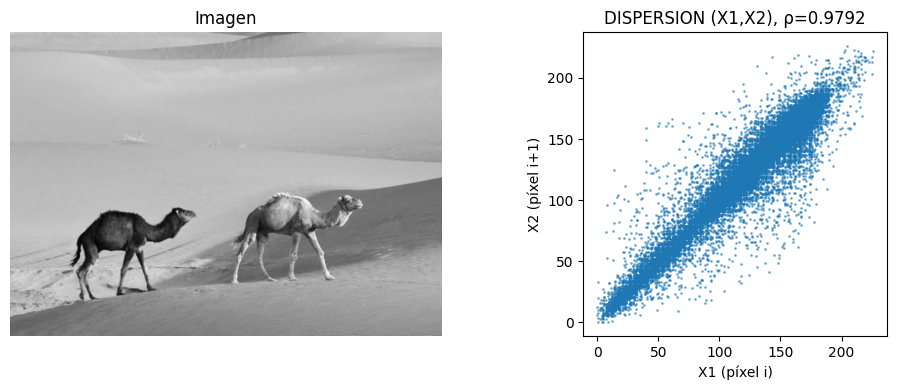

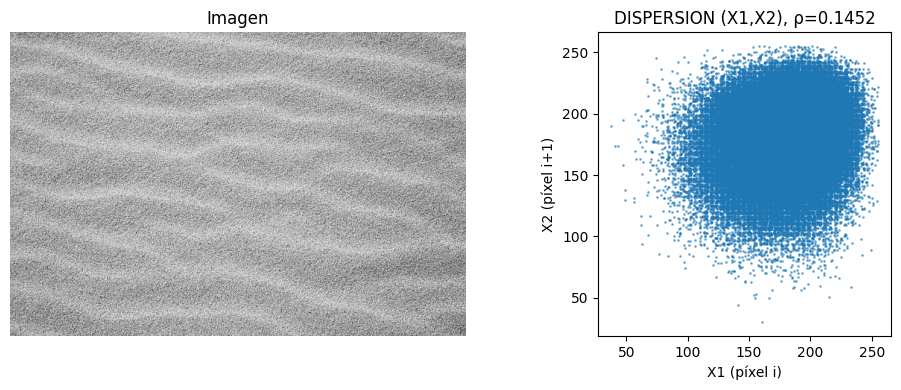

In [14]:
# Imagen 1
img1 = cargar_gris_float("./img_01.jpg")
X1 = imagen_a_pares(img1)
rho1 = correlacion_pearson(X1)
graficar_imagen_y_dispersion(img1, X1, titulo=f"DISPERSION (X1,X2), ρ={rho1:.4f}")

# Imagen 2
img2 = cargar_gris_float("./img_02.jpg")
X2 = imagen_a_pares(img2)
rho2 = correlacion_pearson(X2)
graficar_imagen_y_dispersion(img2, X2, titulo=f"DISPERSION (X1,X2), ρ={rho2:.4f}")




Conclusion Ejercicio 1a)

El gráfico de dispersión muestra la relación entre el valor de un píxel y el valor del píxel de abajo en la imagen. Cada punto representa un par (píxel superior, píxel inferior). Si los puntos se agrupan cerca de la diagonal, significa que los valores de píxeles vecinos son similares y hay alta correlación.

Ejercicio 1b)

Estimar el coeficiente de correlacion de cada vector. ¿Que diferencias observa para ambas
imagenes? ¿Cual de ellas podrıa comprimir la informacion con una mayor calidad?


In [15]:
print(f"Correlación Imagen 1: ρ={rho1:.4f}")
print(f"Correlación Imagen 2: ρ={rho2:.4f}")

Correlación Imagen 1: ρ=0.9792
Correlación Imagen 2: ρ=0.1452


La correlación de Pearson mide cuán relacionados están los valores de los píxeles vecinos. Un valor cercano a 1 indica que los píxeles tienden a tener valores similares (alta correlación). Un valor cercano a 0 indica que no hay relación.

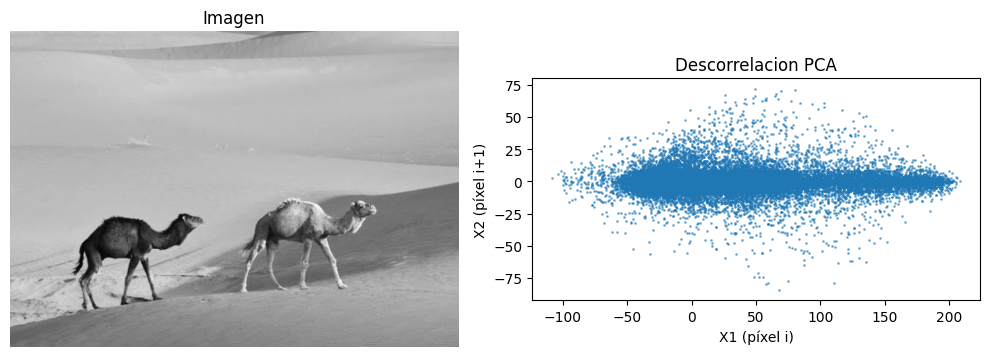

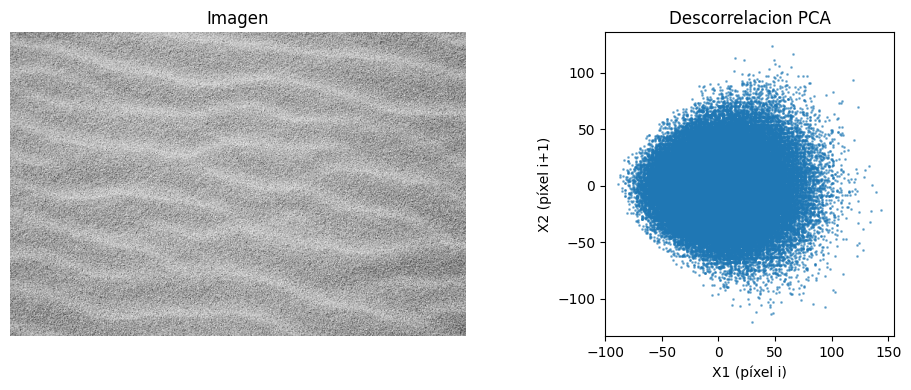

In [16]:
Y1, media1, P1, autoval1 = descorrelacion_pca_2d(X1)
Y2, media2, P2, autoval2 = descorrelacion_pca_2d(X2)

graficar_imagen_y_dispersion(img1, Y1, titulo=f"Descorrelacion PCA")
graficar_imagen_y_dispersion(img2, Y2, titulo=f"Descorrelacion PCA")
